In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data=pd.read_csv(r"D:\Data Science Assignment\Support vector\forestfires.csv")

In [3]:
data

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [4]:
data.shape

(517, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df=data.copy()

In [7]:
df.drop(["month","day"],axis=1,inplace=True)

In [8]:
df

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0          small  
1           1         0          small  
2           1         0          small  
3           0         0          small  
4           0         0          small  
..        ...       ...            ...  
512         0         0          large  
513         0         0          large  
514         0         0          large  
515         0         0          small  
516         0         0          small  

[517 rows x 29 columns]

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['size_category']=le.fit_transform(df['size_category'].astype(str))
df

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0              1  
1           1         0              1  
2           1         0              1  
3           0         0              1  
4           0         0              1  
..        ...       ...            ...  
512         0         0              0  
513         0         0              0  
514         0         0              0  
515         0         0              1  
516         0         0              1  

[517 rows x 29 columns]

D:\anaconda\nik\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='size_category', ylabel='Density'>

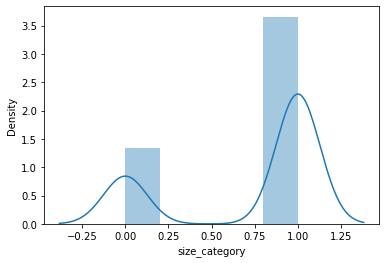

In [10]:
sns.distplot(df.size_category)


In [11]:
x=df.iloc[:,0:28]
y=df.iloc[:,28]

In [12]:
x

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
512         0         0         0  
513         0         0         0  
514         0         0         0  
515         0         0         0  
516         1         0         0  

[517 rows x 28 columns]

In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [15]:
clf=SVC()
param_grid=[{'kernel':["poly","rbf","linear"],'gamma':[100,50,10,0.5,0.1],'C':[15,14,13,12,12,10,0.1,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 12, 10, 0.1, 0.001],
                          'gamma': [100, 50, 10, 0.5, 0.1],
                          'kernel': ['poly', 'rbf', 'linear']}])

In [16]:
gsv.best_params_,gsv.best_score_


({'C': 15, 'gamma': 100, 'kernel': 'linear'}, 0.9888888888888889)

In [17]:
clf=SVC(C=15,kernel="poly",gamma=100,)
clf.fit(x_train,y_train)

SVC(C=15, gamma=100, kernel='poly')

In [18]:
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy=",acc)
confusion_matrix(y_test,y_pred)

Accuracy= 96.15384615384616


array([[ 46,   4],
       [  2, 104]], dtype=int64)

In [19]:
y_pred


array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0])

In [20]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.96      0.98      0.97       106

    accuracy                           0.96       156
   macro avg       0.96      0.95      0.96       156
weighted avg       0.96      0.96      0.96       156

